In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [2]:
river='Sydenham_R'

location = (42.598143, -82.364169)

In [3]:
WSC_STATIONS = pd.read_pickle('data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

PWQMN = pd.read_pickle('data/PWQMN')

elem = 'PHOSPHORUS,UNFILTERED TOTAL'
PWQMN = PWQMN[PWQMN["PARM DESCRIPTION"]==elem]
PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000

PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

elem_name='Phosphorus total'

GLNI = GLNI[GLNI.VariableCommonName==elem_name]

GLNI.SiteName.unique()

delta = 0.5
near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
                     (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]


Flow_IDS = [[st, False] for st in near_stations.STATION_NUMBER.unique()] 

near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
                     (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
                     (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


PWQMN_IDS = [[st, False] for st in set(PWQMN.STATION.unique()).intersection(near_pwqmn_stations.STATION.unique())]

all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

all_near_stations = pd.concat([near_stations, near_pwqmn_stations, near_glni_stations])



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [4]:
Show_IDS = [[st, False] for st in all_near_stations.STATION.unique()] 

In [233]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=9.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all Flow
# for index, st_dic in enumerate(Flow_IDS):
#     st = st_dic[0]
# #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# #     if N>10:
#     st_df = near_stations[near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=st_df.STATION.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)

# # show all
if 0:
    for index, st_dic in enumerate(Show_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = all_near_stations[all_near_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
                     ).add_to(m)
else:
    Show_IDS = [
    [4002701702, True],
    ["ON02GC1800", True],
    [4002700602, False],
    ["ON02GG1000", True],
    ["02GG003", True],
    [4002700802, False],
    ["02GG013", False],
    ["02GG009", False],
    [4002700402, True],
    ["02GG006", True],
    ]



    for index, st_dic in enumerate(Show_IDS):
        st = st_dic[0]
        print(st)
        if st_dic[1]:
            clr='#f44242'
        else:
            clr='#0b15c4'
        st_df = all_near_stations[all_near_stations.STATION == st]
        folium.CircleMarker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], radius=23, 
                            fill=True, fill_color='white',
                                color = clr,fill_opacity=1,
                           weight=5).add_to(m)

        if not index+1 in [1,4,]:
            folium.map.Marker(
            location=[st_df.LATITUDE.values[0]+0.0235,st_df.LONGITUDE.values[0]-0.1026], # 10 km
#             location=[st_df.LATITUDE.values[0]+0.0135,st_df.LONGITUDE.values[0]-0.0526], # 5km
#             location=[st_df.LATITUDE.values[0]+0.0065,st_df.LONGITUDE.values[0]-0.026], # 2km
#             location=[st_df.LATITUDE.values[0]+0.003,st_df.LONGITUDE.values[0]-0.013], # 1km
    #         location=[st_df.LATITUDE.values[0]+0.0015,st_df.LONGITUDE.values[0]-0.0064], # 500m
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
                )
            ).add_to(m)




m



# 02GG008
# 4002700102
# 4002701702
# 4002700202
# ON02GC1800
# 4002700502
# 4002700602
# ON02GG1000


4002701702
ON02GC1800
4002700602
ON02GG1000
02GG003
4002700802
02GG013
02GG009
4002700402
02GG006


In [53]:
selected_stations = [s[0] for s in Show_IDS]

In [54]:
TP_1 = PWQMN[PWQMN.STATION.isin(selected_stations)][['DATE', 'RESULT','STATION']]
TP_1['RESULT'] = pd.to_numeric(TP_1['RESULT'])
TP_1['RESULT'] = TP_1['RESULT']*(TP_1['RESULT']<20)

TP_2 = GLNI[GLNI.SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_2 = TP_2[['SampleDateTime', 'Value', 'SiteCode']]
TP_2 = TP_2.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})

TP = pd.concat([TP_1, TP_2])


TP['RESULT'] = pd.to_numeric(TP['RESULT'])

pt = sns.color_palette("colorblind", len(selected_stations))



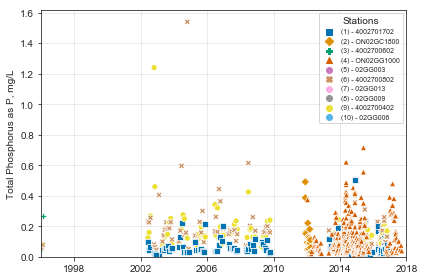

In [55]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(x='DATE', y='RESULT', data=TP, hue_order=selected_stations, hue='STATION', style='STATION', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Canada/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_TP.pdf')



In [56]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
      

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
STATION    &        &       &       &       &       &       &       &       \\
\midrule
4002701702 &  101.0 &  0.07 &  0.06 &  0.01 &  0.04 &  0.05 &  0.08 &  0.50 \\
ON02GC1800 &   20.0 &  0.14 &  0.12 &  0.03 &  0.06 &  0.12 &  0.15 &  0.49 \\
4002700602 &    2.0 &  0.16 &  0.16 &  0.05 &  0.11 &  0.16 &  0.22 &  0.27 \\
ON02GG1000 &  361.0 &  0.13 &  0.11 &  0.01 &  0.05 &  0.08 &  0.16 &  0.72 \\
02GG003    &    NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN \\
4002700802 &  101.0 &  0.17 &  0.17 &  0.03 &  0.10 &  0.15 &  0.20 &  1.54 \\
02GG013    &    NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN \\
02GG009    &    NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN \\
4002700402 &   99.0 &  0.16 &  0.14 &  0.04 &  0.09 &  0.13 &  0.18 &  1.24 \\
02GG006    &    NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN \\
\bottomrule


In [57]:
selected_stations

[4002701702,
 'ON02GC1800',
 4002700602,
 'ON02GG1000',
 '02GG003',
 4002700802,
 '02GG013',
 '02GG009',
 4002700402,
 '02GG006']

In [58]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = TP[TP.STATION.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(482, 4)

In [59]:
master_st_df.DATE = master_st_df.DATE.dt.date
# = pd.to_date(master_st_df.DATE, format="%Y-%m-%d")
# master_st_df

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [60]:
master_st_df[[
    'DATE','USGSPCode', 'RESULT']].groupby('DATE').mean().reset_index().sort_values('DATE').to_csv(
    'One_by_one/Canada/'+river+'/TP_'+river+'iver_data.csv', index=False)

### Discharge

In [33]:
river

'Sydenham_R'

In [40]:
sites = ['02GG003', '02GG006']
discharge = pd.DataFrame({})
for site in sites:
    d = WSC_FLOWS[WSC_FLOWS.index>datetime.datetime(1996,1,1)][site].to_frame()

    d = d.reset_index()
    d = d.rename(index=str, columns={site:'Discharge, cms', 'index':'Date'})
    d['Source'] = site

    d['Flow, CFS'] = d['Discharge, cms']/0.028
    discharge = pd.concat([discharge, d])

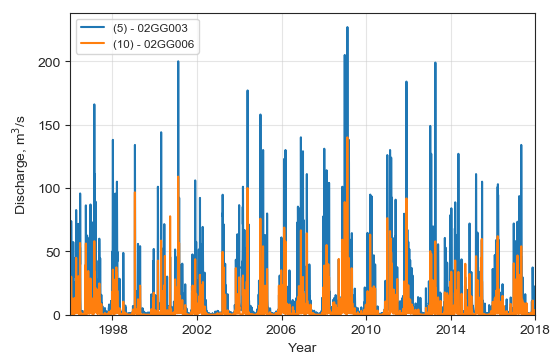

In [42]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site) for site in sites], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Canada/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_Q.pdf')

In [62]:
discharge[discharge.Source=='02GG003'][['Date', 'Flow, CFS']].to_csv('One_by_one/Canada/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### Egret

In [139]:
river

'Sydenham_R'

In [140]:
EGRET_Sample = pd.DataFrame({})
EGRET_Daily = pd.DataFrame({})
for number in [1,2]:
    ED = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result '+str(number)+'/TP/'+river+'iver_TP_Daily.csv')
    ES = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result '+str(number)+'/TP/'+river+'iver_TP_Sample.csv')
    ES['shoulder'] = number
    ED['shoulder'] = number
    EGRET_Sample = pd.concat([EGRET_Sample, ES])
    EGRET_Daily = pd.concat([EGRET_Daily, ED])

EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


In [141]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

In [201]:
leg_handles

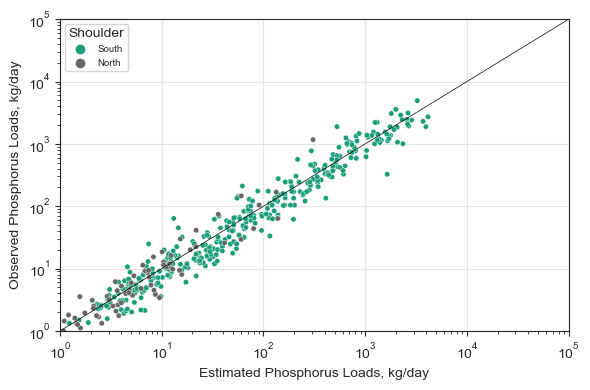

In [222]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
                hue='shoulder',
                hue_order=[1,2],
               palette='Dark2')
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[2:], ['South','North'], title='Shoulder', fontsize='x-small', loc='best')
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
plt.xlim(1,100000)
plt.ylim(1,100000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_FvsF.pdf')


In [143]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365

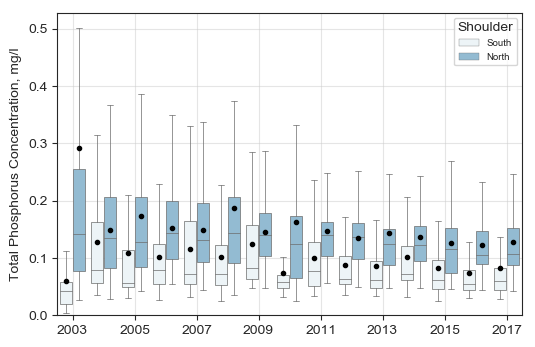

In [230]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2018), hue='shoulder')


leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['South','North'], title='Shoulder', fontsize='x-small', loc='best')


# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
# plt.xlim(6.5, 18.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_PC.pdf')




In [173]:
EGRET_Daily_an = EGRET_Daily.groupby(['shoulder','waterYear']).mean().reset_index()
EGRET_Daily_an

,shoulder,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,...,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1,1996,137.0,15.341648,53462.0,5.021978,138.000000,1996.375797,1757.021978,137.0,...,14.936515,14.963326,-2.213947,0.367917,0.207704,623.995298,0.242743,1740.139442,227.758284,88.184260
1,1,1997,456.0,17.278635,53781.0,6.526027,183.838356,1997.248146,1767.501370,456.0,...,17.782100,18.235922,-1.998010,0.384806,0.241952,1114.933327,0.225374,1649.282034,406.950665,71.794968
2,1,1998,821.0,10.930477,54146.0,6.526027,183.838356,1998.248059,1779.501370,821.0,...,10.935472,10.962626,-2.486085,0.385090,0.134765,317.116399,0.196053,1254.199066,115.747486,45.072017
3,1,1999,1186.0,5.582301,54511.0,6.526027,183.838356,1999.248059,1791.501370,1186.0,...,5.583515,5.589053,-3.120117,0.356372,0.073290,128.295358,0.173808,970.216435,46.827806,18.215724
4,1,2000,1551.5,10.451414,54876.5,6.513661,183.500000,2000.248661,1803.497268,1551.5,...,10.341568,10.064074,-2.611496,0.412265,0.118934,281.537161,0.157135,768.148005,102.761064,34.949057
5,1,2001,1917.0,10.002840,55242.0,6.526027,183.838356,2001.248146,1815.501370,1917.0,...,10.092897,10.346136,-2.502708,0.397079,0.158799,933.658718,0.143208,616.032055,340.785432,54.530010
6,1,2002,2282.0,11.755791,55607.0,6.526027,183.838356,2002.248059,1827.501370,2282.0,...,11.773878,11.800984,-2.416028,0.377863,0.126027,241.813377,0.132479,507.150195,88.261883,36.494495
7,1,2003,2647.0,5.314801,55972.0,6.526027,183.838356,2003.248059,1839.501370,2647.0,...,5.309336,5.296865,-3.371411,0.362939,0.059569,96.742453,0.123773,427.178098,35.310995,14.047175
8,1,2004,3012.5,14.324760,56337.5,6.513661,183.500000,2004.248661,1851.497268,3012.5,...,14.330888,14.331572,-2.430241,0.403239,0.128309,385.880786,0.116934,370.049453,140.846487,51.836220
9,1,2005,3378.0,11.968054,56703.0,6.526027,183.838356,2005.248146,1863.501370,3378.0,...,11.960116,11.960155,-2.654461,0.379695,0.108281,355.569822,0.110746,324.659205,129.782985,45.100746


In [148]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




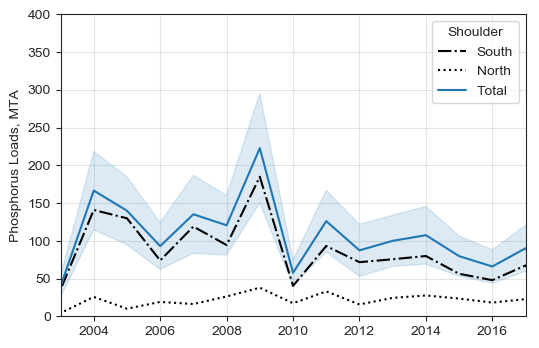

In [228]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an[EGRET_Daily_an.shoulder==1]['waterYear'][:k], EGRET_Daily_an[EGRET_Daily_an.shoulder==1]['FluxYearMTA'][:k],  'k-.', label='South')
plt.plot(EGRET_Daily_an[EGRET_Daily_an.shoulder==2]['waterYear'][:k], EGRET_Daily_an[EGRET_Daily_an.shoulder==2]['FluxYearMTA'][:k], 'k:',label='North')
plt.plot(EGRET_Daily_an[EGRET_Daily_an.shoulder==2]['waterYear'][:k], EGRET_Daily_an[EGRET_Daily_an.shoulder==1]['FluxYearMTA'][:k].values + EGRET_Daily_an[EGRET_Daily_an.shoulder==2]['FluxYearMTA'][:k].values, c=sns.color_palette()[0], label='Total')
# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][EGRET_Daily_an.shoulder==1][:k],
                 EGRET_Daily_an[EGRET_Daily_an.shoulder==1]['FluxYearMTA'][:k].values + EGRET_Daily_an[EGRET_Daily_an.shoulder==2]['FluxYearMTA'][:k].values-EGRET_Daily_an['Fx_SE'][EGRET_Daily_an.shoulder==1][:k],
                 EGRET_Daily_an[EGRET_Daily_an.shoulder==1]['FluxYearMTA'][:k].values + EGRET_Daily_an[EGRET_Daily_an.shoulder==2]['FluxYearMTA'][:k].values+EGRET_Daily_an['Fx_SE'][EGRET_Daily_an.shoulder==1][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)

plt.legend(title='Shoulder')

# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.ylim(0,400)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_PFlux.pdf')


In [174]:
print(EGRET_Daily_an[(EGRET_Daily_an.shoulder==1) & (EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
     7  &      8  &      9  &      10 &      11 &      12 &      13 &      14 &      15 &      16 &      17 &      18 &      19 &      20 &      21 \\
\midrule
 2003.0 &  2004.0 &  2005.0 &  2006.0 &  2007.0 &  2008.0 &  2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 \\
   35.3 &   140.8 &   129.8 &    73.9 &   118.9 &    94.3 &   184.8 &    40.2 &    93.1 &    71.7 &    75.5 &    79.8 &    56.3 &    47.8 &    67.3 \\
   14.0 &    51.8 &    45.1 &    31.1 &    51.7 &    39.5 &    72.6 &    17.1 &    40.8 &    34.5 &    34.0 &    38.2 &    26.7 &    22.1 &    30.7 \\
\bottomrule
\end{tabular}



In [175]:
print(EGRET_Daily_an[(EGRET_Daily_an.shoulder==2) & (EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
     30 &      31 &      32 &      33 &      34 &      35 &      36 &      37 &      38 &      39 &      40 &      41 &      42 &      43 &      44 \\
\midrule
 2003.0 &  2004.0 &  2005.0 &  2006.0 &  2007.0 &  2008.0 &  2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 \\
    4.2 &    25.7 &    10.0 &    19.0 &    16.2 &    26.2 &    37.9 &    17.3 &    32.9 &    15.7 &    24.4 &    27.6 &    23.4 &    18.1 &    22.7 \\
    1.3 &    10.0 &     3.8 &     7.9 &     6.8 &    11.3 &    15.8 &     7.4 &    14.4 &     6.6 &    10.4 &    12.3 &    10.3 &     7.8 &     9.2 \\
\bottomrule
\end{tabular}

